In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv("/Users/biswajit/Downloads/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.drop(['RowNumber','CustomerId','Surname'],inplace=True,axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


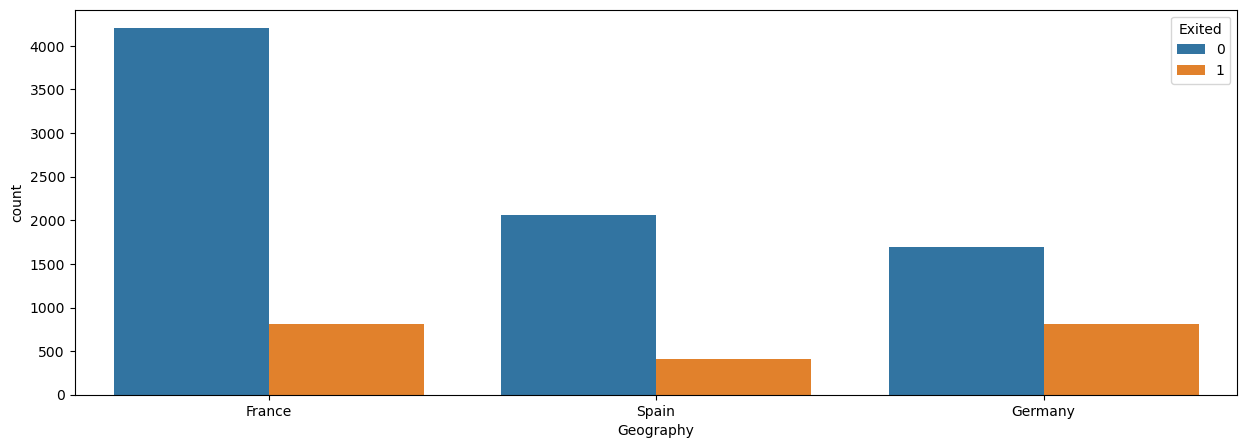

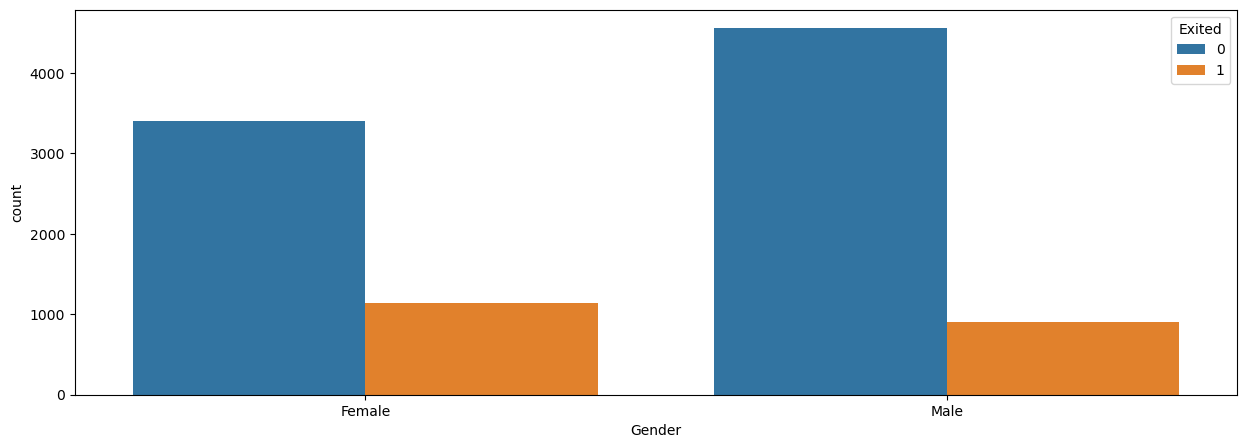

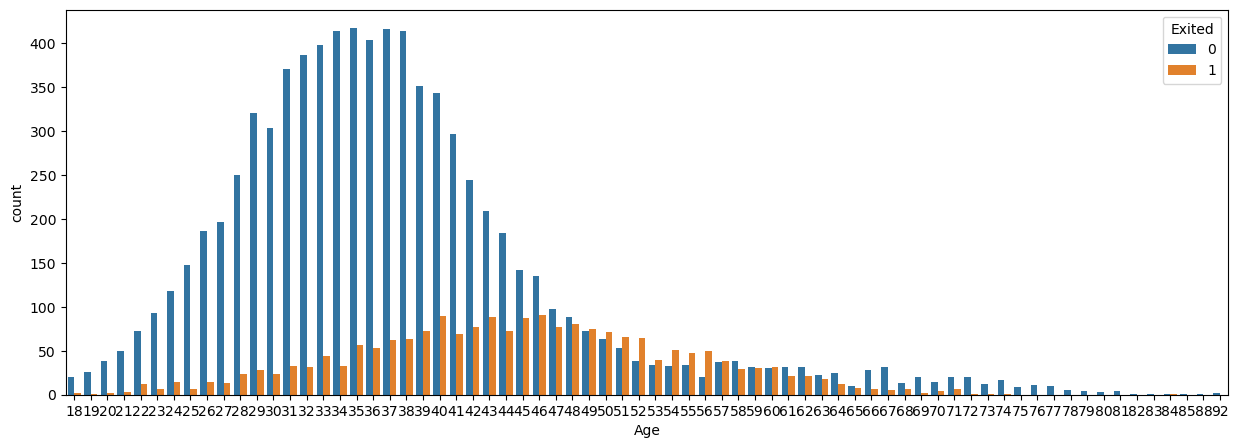

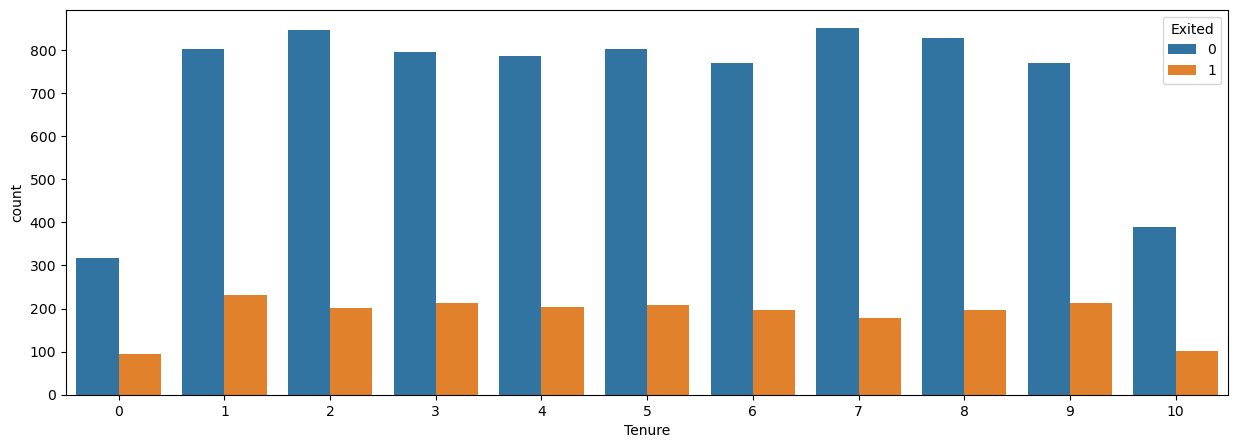

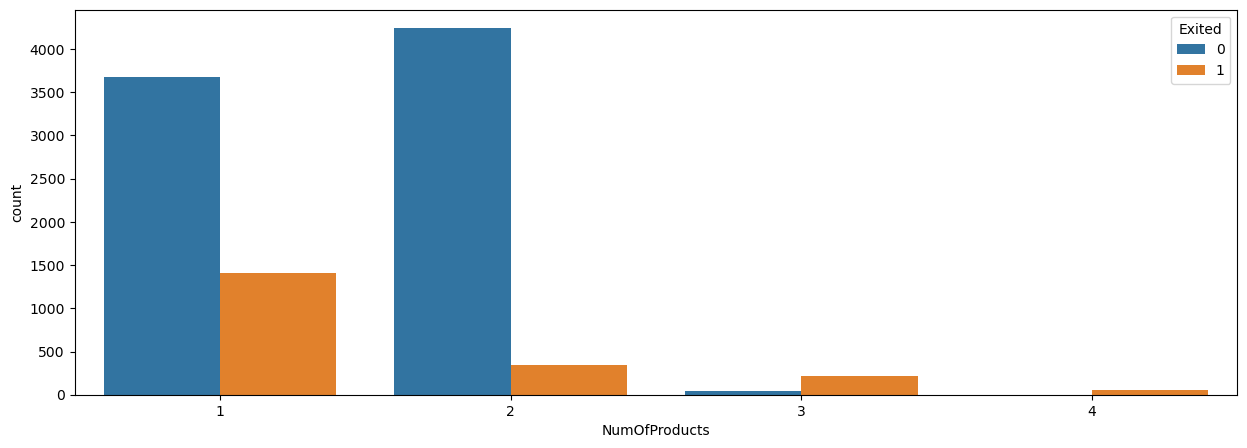

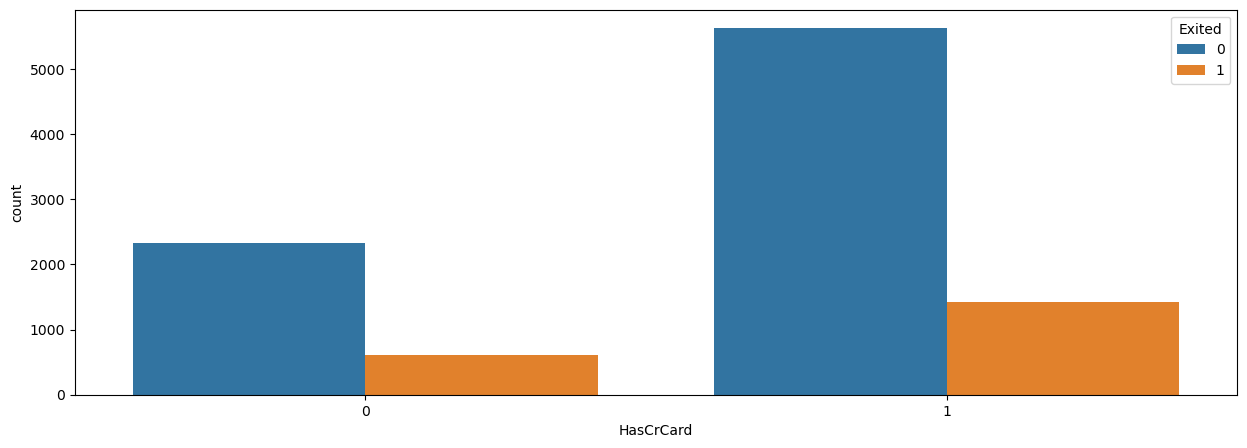

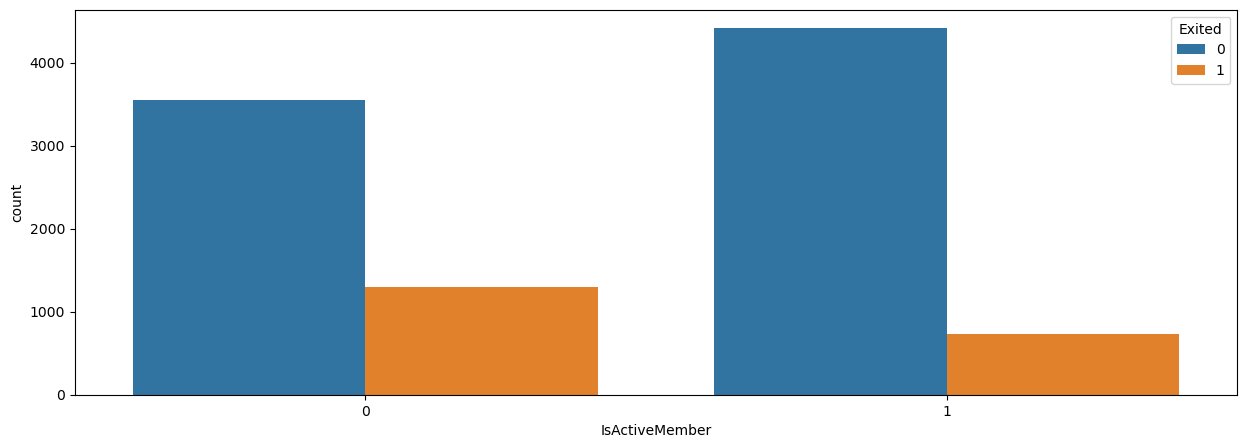

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
for i , c in enumerate(df.drop(columns=['Exited','Balance','EstimatedSalary','CreditScore'])):
    plt.figure(i, figsize=(15, 5))
    sns.countplot(data=df,x=c,hue='Exited')

<Axes: >

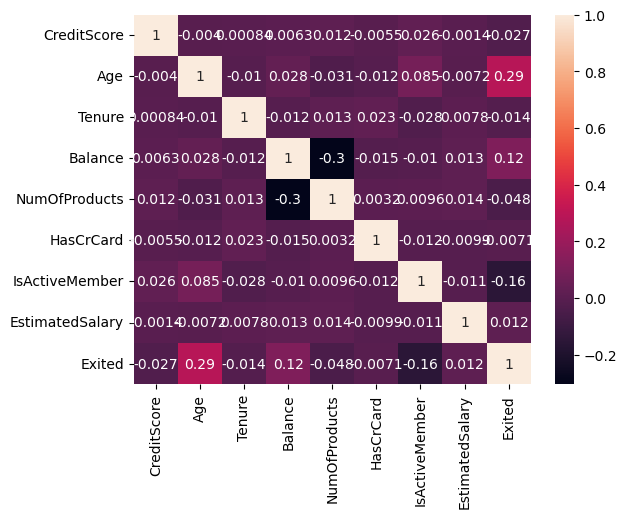

In [10]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

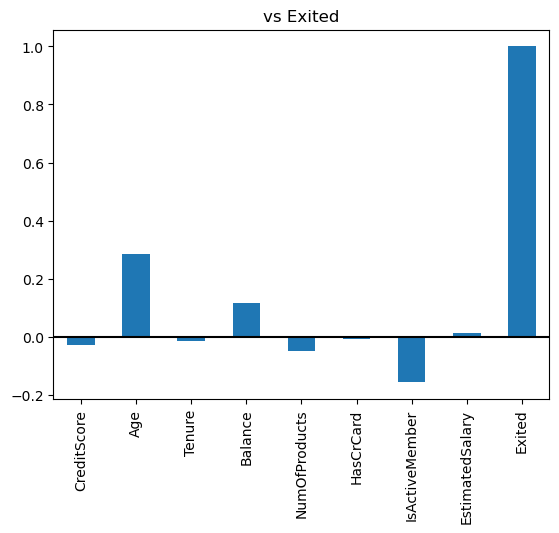

In [11]:
df.corr(numeric_only=True)['Exited'].plot(kind='bar',title='vs Exited')
plt.axhline(y = 0,color='black', linestyle = '-')

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df['Balance'] = df['Balance'].astype(int)

In [23]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807,1,0,1,112542.58,0
2,502,France,Female,42,8,159660,3,1,0,113931.57,1
3,699,France,Female,39,1,0,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369,1,1,1,101699.77,0
9997,709,France,Female,36,7,0,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075,2,1,0,92888.52,1


In [14]:
X=df.drop('Exited', axis=1)
y=df['Exited']

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
ct=ColumnTransformer(
    [
        ('ohe',OneHotEncoder(drop='first'),['Geography','Gender']),
        ('sc',StandardScaler(),['CreditScore','Age','Balance','EstimatedSalary']),
    ]
)
X_new = ct.fit_transform(X)
X_new

array([[ 0.        ,  0.        ,  0.        , ...,  0.29351742,
        -1.2258469 ,  0.02188649],
       [ 0.        ,  1.        ,  0.        , ...,  0.19816383,
         0.11734175,  0.21653375],
       [ 0.        ,  0.        ,  0.        , ...,  0.29351742,
         1.33305032,  0.2406869 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.27860412,
        -1.2258469 , -1.00864308],
       [ 1.        ,  0.        ,  1.        , ...,  0.29351742,
        -0.02260746, -0.12523071],
       [ 0.        ,  0.        ,  0.        , ..., -1.04143285,
         0.85996045, -1.07636976]])

In [16]:
# Train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier

In [18]:
clf = Pipeline([('rfc', GradientBoostingClassifier())])

clf.fit(X_train, y_train)

Pipeline(steps=[('rfc', GradientBoostingClassifier())])

In [19]:
# Gradient Classifier
model_gc = GradientBoostingClassifier()
model_gc.fit(X_train, y_train)
y_pred = model_gc.predict(X_test)
accuracy_score(y_test, y_pred)

0.836

In [20]:
from sklearn.metrics import classification_report

In [21]:
# y_test = X_train['y_test']
# y_pred = X_test['y_pred']

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1612
           1       0.66      0.32      0.43       388

    accuracy                           0.84      2000
   macro avg       0.76      0.64      0.67      2000
weighted avg       0.82      0.84      0.81      2000



In [22]:
import pickle
pickle.dump(clf, open("customer_churn_prediction.pkl", 'wb'))